In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import mean_absolute_error

import os 
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

import pickle

folder_figures = 'figures'

In [2]:
# Aubin measured curves
file_name = 'data/Prom_2deg_Patricks.xlsx'
sheet = 'Ratio'
df = pd.read_excel(file_name, sheet, skiprows=1)

# Fitted table 
fp_aub_fit = 'data/patrick_ratio_fitting.csv'
df_fit = pd.read_csv(fp_aub_fit)
aub_labels = df_fit['Aubin label']
pat_labels = df_fit['Patrick label']



/var/folders/hr/1j50v5r91sv8fs_r8qhx8bym0000gn/T/ipykernel_9116/1159659047.py:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(color='purple', label='Kunz et al.', alpha=0.7, edgecolor='black'),
/var/folders/hr/1j50v5r91sv8fs_r8qhx8bym0000gn/T/ipykernel_9116/1159659047.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='darkorange', label='New measurement', alpha=0.7, edgecolor='black')]


MAE:  1.7631614683333297


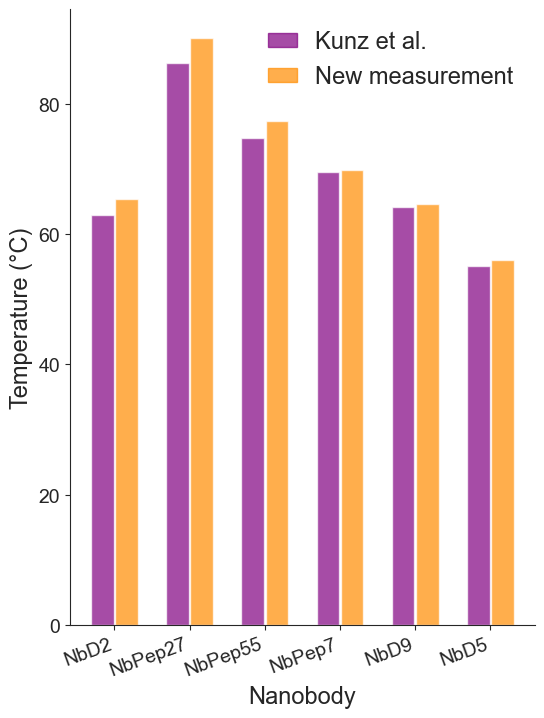

In [3]:
# Plot bar plots

sns.set_style('white', {'axes.spines.right':False, 'axes.spines.top': False,
                    'xtick.bottom': True, 'ytick.left': True})
fig, ax = plt.subplots()
fig.set_size_inches(6,8)

palette = sns.color_palette("colorblind")

values, xs, colors = list(), list(), list()
k = 0 
for aub_tm, pat_tm in zip(df_fit['Aubin measured Tm (ratio fitting)'], df_fit['Tm (Patrick)']):
    values.append(pat_tm)
    values.append(aub_tm)
    colors.append('purple')
    colors.append('darkorange')
    xs.append(k - 0.16)
    xs.append(k + 0.16)
    k+=1

ax.set_xticks(range(len(pat_labels)))
ax.set_xticklabels(pat_labels)

plt.bar(xs, values, width=0.3, color=colors, alpha=0.7)
plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='right')

plt.xlabel('Nanobody', fontsize=17)
plt.ylabel('Temperature (°C)', fontsize=17)
plt.tick_params(bottom=True, left=True, labelsize=14)

handles = [mpatches.Patch(color='purple', label='Kunz et al.', alpha=0.7, edgecolor='black'),
           mpatches.Patch(color='darkorange', label='New measurement', alpha=0.7, edgecolor='black')]

legend = plt.legend(handles=handles, loc='upper right', ncol=1,frameon=True, 
                    markerscale=1.6, fontsize=17, edgecolor = 'w', handlelength=1.2, handleheight=0.55)

plt.savefig(os.path.join(folder_figures, f'figureS2.png'), dpi=800, bbox_inches='tight', transparent=True)


print('MAE: ', mean_absolute_error(df_fit['Aubin measured Tm (ratio fitting)'],  df_fit['Tm (Patrick)']))